In [1]:
%pip install pyautogen matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [10]:
from IPython.display import Image, display

import autogen
from autogen.coding import LocalCommandLineCodeExecutor

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST.json",
)

In [13]:

assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "config_list": config_list,
        "temperature": 0, 
    }, 
    system_message="당신은 파이썬 코드를 전문적으로 만드는 에이전트입니다. 코드를 생성하고 오류가 있으면 수정하세요. ",
)


user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="coding1"),
    },
)

chat_res = user_proxy.initiate_chat(
    assistant,
    message="""오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.

--------------------------------------------------------------------------------


assistant (to user_proxy):

오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성해보겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `datetime` 라이브러리를 사용하여 데이터를 처리하겠습니다.

먼저 필요한 라이브러리를 설치해야 합니다. 터미널이나 명령 프롬프트에서 다음 명령어를 실행하세요:
```sh
pip install yfinance pandas
```

이제 파이썬 코드를 작성해보겠습니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime

# 오늘 날짜를 확인합니다.
today = datetime.today().strftime('%Y-%m-%d')
print(f"오늘 날짜: {today}")

# 연초 날짜를 설정합니다.
start_date = f"{datetime.today().year}-01-01"

# META와 TSLA의 주식 데이터를 가져옵니다.
meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")

# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.
meta_data = meta.history(start=start_date, end=today)
tesla_data = tesla.history(start=start_date, end=today)

# 연초 대비 누적 수익률을 계산합니다.
meta_data['Cumulative Return'] = (meta_data['Close'] / meta_data['Close'].iloc[0]) - 1
tesla_data['Cumulative Return'] = (tesla_data['Close'] / tesla_data['Close'].iloc[0]) - 1

# 연초 대비 누적 수익률을 출력합니다.
print(f"META 연초 대비 누적 수익률:

KeyboardInterrupt: 

In [ ]:
print("Chat history:", chat_res.chat_history)

print("Summary:", chat_res.summary)
print("Cost info:", chat_res.cost)

Chat history: [{'content': '오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.', 'role': 'assistant'}, {'content': '오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성하겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `matplotlib`를 사용하여 데이터를 처리하고 시각화하겠습니다.\n\n먼저 필요한 라이브러리를 설치해야 합니다:\n```bash\npip install yfinance pandas matplotlib\n```\n\n이제 파이썬 코드를 작성하겠습니다:\n\n```python\nimport yfinance as yf\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom datetime import datetime\n\n# 오늘 날짜 출력\ntoday = datetime.today().strftime(\'%Y-%m-%d\')\nprint(f"오늘은 {today}입니다.")\n\n# 주식 데이터 다운로드\ntickers = [\'META\', \'TSLA\']\ndata = yf.download(tickers, start=\'2023-01-01\', end=today)[\'Adj Close\']\n\n# 연간 누적 수익률 계산\ncumulative_returns = (data / data.iloc[0] - 1) * 100\n\n# 데이터 시각화\nplt.figure(figsize=(14, 7))\nfor ticker in tickers:\n    plt.plot(cumulative_returns[ticker], label=ticker)\n\nplt.title(\'META와 TESLA의 연간 누적 수익률 비교\')\nplt.xlabel(\'날짜\')\nplt.ylabel(\'누적 수익률 (%)\')\nplt.legend()\np

In [16]:
user_proxy.send(
    recipient=assistant,
    message="""연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.""",
)

user_proxy (to assistant):

연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.

--------------------------------------------------------------------------------
assistant (to user_proxy):

연간 주가 변동 차트를 플롯하고 데이터를 CSV 파일에 저장하며, 플롯을 PNG 파일로 저장하는 코드를 작성해보겠습니다. 이를 위해 `pandas`를 사용하여 데이터를 CSV 파일로 저장하고, `matplotlib`를 사용하여 플롯을 생성합니다.

다음은 전체 코드를 함수로 작성한 예제입니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    return stock_data

def save_stock_data_to_csv(tickers, start_date, end_date, filename):
    all_data = pd.DataFrame()
    
    for ticker in tickers:
        stock_data = get_stock_data(ticker, start_date, end_date)
        stock_data['Ticker'] = ticker
        all_data = pd.concat([all_data, stock_data])
    
    all_data.to_csv(filename)
    print

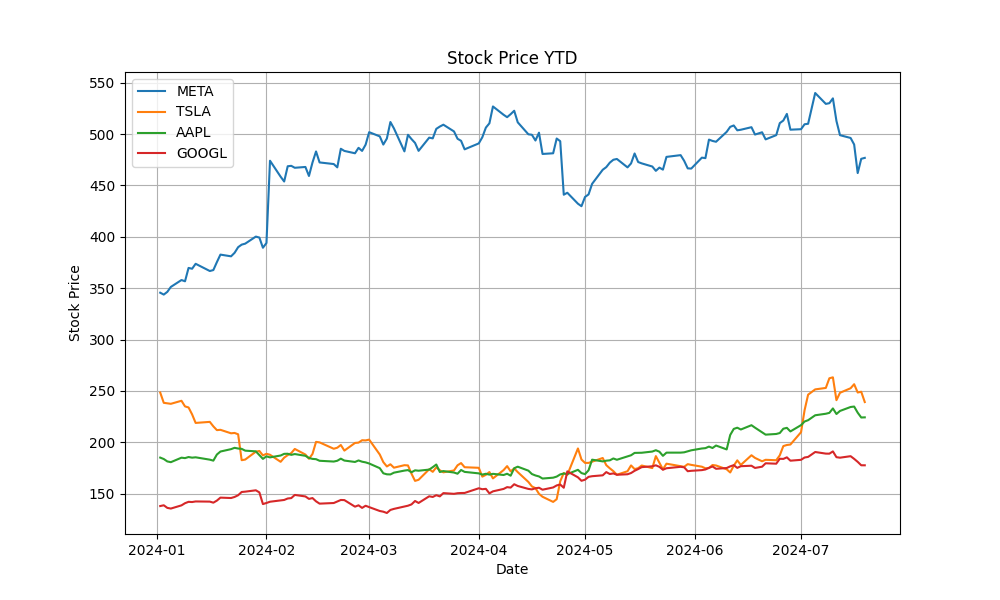

In [17]:
try:
    image = Image(filename="coding1/stock_price_ytd.png")
    display(image)
except FileNotFoundError:
    print("Image not found. Please check the file name and modify if necessary.")

In [19]:
# Path to your CSV file
file_path = "coding1/stock_price_ytd.csv"
try:
    with open(file_path, mode="r", encoding="utf-8") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list using the comma as a separator
            row = line.strip().split(",")
            # Print the list representing the current row
            print(row)
except FileNotFoundError:
    print("File not found. Please check the file name and modify if necessary.")

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ticker']
['2024-01-02 00:00:00-05:00', '350.599548159297', '352.4357711788527', '339.31274424531915', '345.5798645019531', '19042200', '0.0', '0.0', 'META']
['2024-01-03 00:00:00-05:00', '344.27254418678', '347.2364546857272', '342.47621725878497', '343.7635803222656', '15451100', '0.0', '0.0', 'META']
['2024-01-04 00:00:00-05:00', '343.7935199027151', '347.4360286089438', '342.69576962625035', '346.40814208984375', '12099900', '0.0', '0.0', 'META']
['2024-01-05 00:00:00-05:00', '346.2784209841403', '352.77508073132583', '345.5499374797681', '351.228271484375', '13920700', '0.0', '0.0', 'META']
['2024-01-08 00:00:00-05:00', '353.97262881201056', '358.24385059684556', '351.32803880361155', '357.92449951171875', '13890200', '0.0', '0.0', 'META']
['2024-01-09 00:00:00-05:00', '355.66910446369656', '359.90042996757035', '354.63122872255843', '356.6969909667969', '13463900', '0.0', '0.0', 'META']
['2024-01-10 0

## Example Task: Use User Defined Message Function to let Agents Analyze data Collected

In [22]:
def my_message_generator(sender, recipient, context):
    # your CSV file
    file_name = context.get("file_name")
    try:
        with open(file_name, mode="r", encoding="utf-8") as file:
            file_content = file.read()
    except FileNotFoundError:
        file_content = "No data found."
    return "데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. \n Data: \n" + file_content


# followup of the previous question
chat_res = user_proxy.initiate_chat(
    recipient=assistant,
    message=my_message_generator,
    file_name="coding1/stock_price_ytd.csv",
    summary_method="reflection_with_llm",
    summary_args={"summary_prompt": "마크다운형태로 블로그 포스트를 한국어로 반환해줘"},
)



user_proxy (to assistant):

데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. 
 Data: 
Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
2024-01-02 00:00:00-05:00,350.599548159297,352.4357711788527,339.31274424531915,345.5798645019531,19042200,0.0,0.0,META
2024-01-03 00:00:00-05:00,344.27254418678,347.2364546857272,342.47621725878497,343.7635803222656,15451100,0.0,0.0,META
2024-01-04 00:00:00-05:00,343.7935199027151,347.4360286089438,342.69576962625035,346.40814208984375,12099900,0.0,0.0,META
2024-01-05 00:00:00-05:00,346.2784209841403,352.77508073132583,345.5499374797681,351.228271484375,13920700,0.0,0.0,META
2024-01-08 00:00:00-05:00,353.97262881201056,358.24385059684556,351.32803880361155,357.92449951171875,13890200,0.0,0.0,META
2024-01-09 00:00:00-05:00,355.66910446369656,359.90042996757035,354.63122872255843,356.6969909667969,13463900,0.0,0.0,META
2024-01-10 00:00:00-05:00,359.43140084658063,372.17520202063497,358.3436093453036,369.71026611328125,22117200,0.0,0.0,META
2024-01-11 0

In [9]:
print(chat_res.summary)



물론입니다! 아래는 마크다운 형식으로 작성된 블로그 포스트입니다.

---

# 데이터 분석의 중요성과 기본 절차

데이터 분석은 현대 비즈니스와 과학 연구에서 필수적인 도구로 자리 잡았습니다. 데이터 분석을 통해 우리는 복잡한 문제를 이해하고, 중요한 결정을 내리며, 미래를 예측할 수 있습니다. 이 블로그 게시물에서는 데이터 분석의 중요성과 기본 절차에 대해 알아보겠습니다.

## 데이터 분석의 중요성

1. **의사 결정 지원**: 데이터 분석은 경영진이 더 나은 결정을 내릴 수 있도록 도와줍니다. 예를 들어, 판매 데이터를 분석하여 어떤 제품이 가장 잘 팔리는지, 어떤 마케팅 전략이 효과적인지 파악할 수 있습니다.

2. **효율성 향상**: 데이터 분석을 통해 비즈니스 프로세스를 최적화하고 비용을 절감할 수 있습니다. 예를 들어, 생산 라인의 데이터를 분석하여 병목 현상을 찾아내고 이를 개선할 수 있습니다.

3. **미래 예측**: 데이터 분석은 과거 데이터를 기반으로 미래를 예측하는 데 사용됩니다. 예를 들어, 기상 데이터를 분석하여 날씨를 예측하거나, 금융 데이터를 분석하여 주식 시장의 변동을 예측할 수 있습니다.

## 데이터 분석의 기본 절차

1. **문제 정의**: 분석할 문제를 명확히 정의합니다. 예를 들어, "어떤 제품이 가장 잘 팔리는가?"와 같은 구체적인 질문을 설정합니다.

2. **데이터 수집**: 문제를 해결하기 위해 필요한 데이터를 수집합니다. 데이터는 내부 데이터베이스, 외부 데이터 소스, 설문 조사 등을 통해 얻을 수 있습니다.

3. **데이터 정제**: 수집한 데이터를 정리하고, 결측값이나 이상값을 처리합니다. 이 단계는 데이터의 품질을 높이는 데 중요합니다.

4. **데이터 분석**: 다양한 분석 기법을 사용하여 데이터를 분석합니다. 통계 분석, 머신러닝, 데이터 시각화 등을 활용할 수 있습니다.

5. **결과 해석**: 분석 결과를 해석하고, 이를 바탕으로 결론을 도출합니다. 이 단계에서는 분석 결과를 이해하기 

물론입니다! 아래는 마크다운 형식으로 작성된 블로그 포스트입니다.

---

# 데이터 분석의 중요성과 기본 절차

데이터 분석은 현대 비즈니스와 과학 연구에서 필수적인 도구로 자리 잡았습니다. 데이터 분석을 통해 우리는 복잡한 문제를 이해하고, 중요한 결정을 내리며, 미래를 예측할 수 있습니다. 이 블로그 게시물에서는 데이터 분석의 중요성과 기본 절차에 대해 알아보겠습니다.

## 데이터 분석의 중요성

1. **의사 결정 지원**: 데이터 분석은 경영진이 더 나은 결정을 내릴 수 있도록 도와줍니다. 예를 들어, 판매 데이터를 분석하여 어떤 제품이 가장 잘 팔리는지, 어떤 마케팅 전략이 효과적인지 파악할 수 있습니다.

2. **효율성 향상**: 데이터 분석을 통해 비즈니스 프로세스를 최적화하고 비용을 절감할 수 있습니다. 예를 들어, 생산 라인의 데이터를 분석하여 병목 현상을 찾아내고 이를 개선할 수 있습니다.

3. **미래 예측**: 데이터 분석은 과거 데이터를 기반으로 미래를 예측하는 데 사용됩니다. 예를 들어, 기상 데이터를 분석하여 날씨를 예측하거나, 금융 데이터를 분석하여 주식 시장의 변동을 예측할 수 있습니다.

## 데이터 분석의 기본 절차

1. **문제 정의**: 분석할 문제를 명확히 정의합니다. 예를 들어, "어떤 제품이 가장 잘 팔리는가?"와 같은 구체적인 질문을 설정합니다.

2. **데이터 수집**: 문제를 해결하기 위해 필요한 데이터를 수집합니다. 데이터는 내부 데이터베이스, 외부 데이터 소스, 설문 조사 등을 통해 얻을 수 있습니다.

3. **데이터 정제**: 수집한 데이터를 정리하고, 결측값이나 이상값을 처리합니다. 이 단계는 데이터의 품질을 높이는 데 중요합니다.

4. **데이터 분석**: 다양한 분석 기법을 사용하여 데이터를 분석합니다. 통계 분석, 머신러닝, 데이터 시각화 등을 활용할 수 있습니다.
...

---

이와 같은 블로그 게시물은 데이터 분석의 중요성과 절차를 이해하는 데 도움이 될 것입니다. 데이터가 주어지면, 구체적인 분석 결과를 포함한 블로그 게시물을 작성할 수 있습니다.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...